In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('framingham.csv')

Kolumny danych (16) 

In [3]:
print(df.columns, len(df.columns))

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object') 16


Sprawdźmy rozkłady danych... 

In [4]:
df['cigsPerDay'].skew()

1.247909902517148

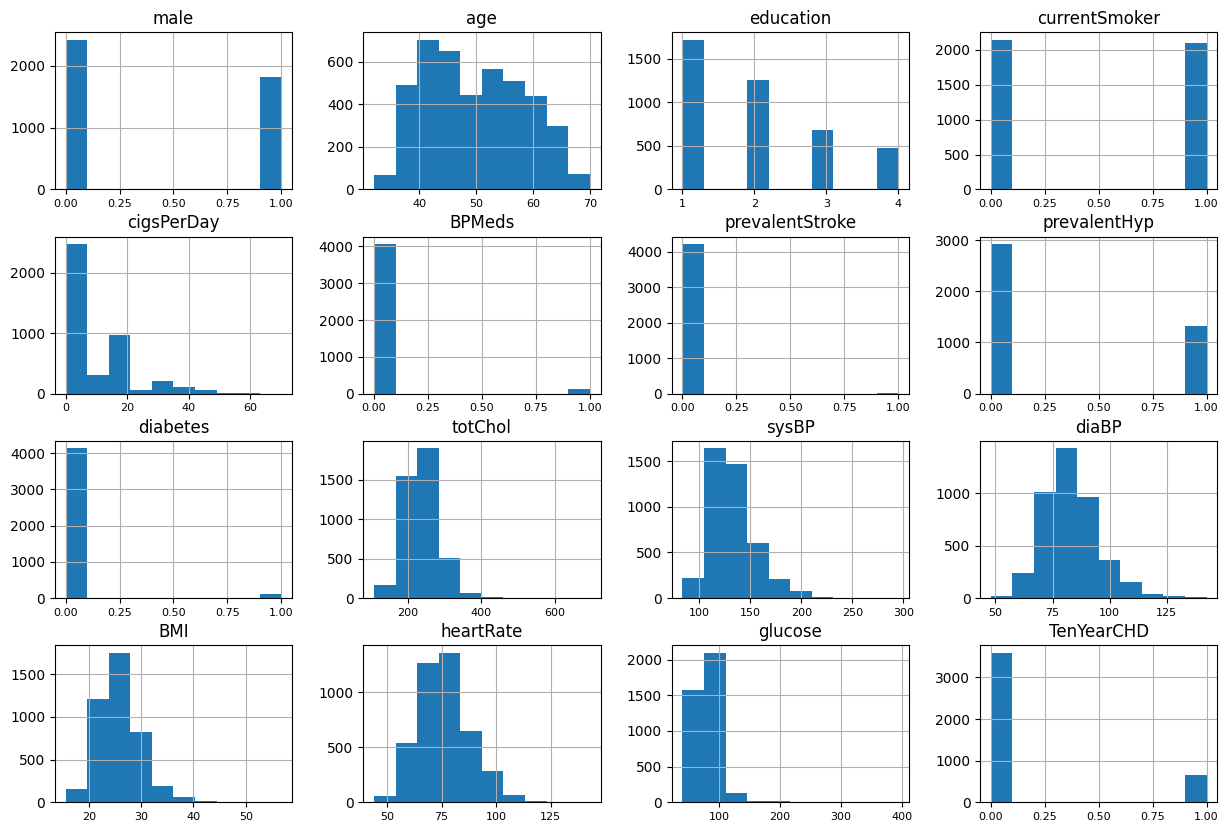

In [5]:
df.hist(xlabelsize=8, figsize=(15,10))
plt.show()

Przyjrzyjmy się typom danych.  
Wszystkie dane są numeryczne.

In [6]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None
(4238, 1

Zbiór danych posiada 4238 rekordów w 15 kolumnach. 

In [7]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


Sprawdźmy liczbę unikalnych wartości:

In [9]:
for col in df.columns:
    if df[col].nunique()<10:
        print(f'Column {col}, unique values: {df[col].nunique()}, \tunikalne wartości: {list(df[col].unique())}')
    else:
        print(f'Column {col}, unique values: {df[col].nunique()}')

Column male, unique values: 2, 	unikalne wartości: [1, 0]
Column age, unique values: 39
Column education, unique values: 4, 	unikalne wartości: [4.0, 2.0, 1.0, 3.0, nan]
Column currentSmoker, unique values: 2, 	unikalne wartości: [0, 1]
Column cigsPerDay, unique values: 33
Column BPMeds, unique values: 2, 	unikalne wartości: [0.0, 1.0, nan]
Column prevalentStroke, unique values: 2, 	unikalne wartości: [0, 1]
Column prevalentHyp, unique values: 2, 	unikalne wartości: [0, 1]
Column diabetes, unique values: 2, 	unikalne wartości: [0, 1]
Column totChol, unique values: 248
Column sysBP, unique values: 234
Column diaBP, unique values: 146
Column BMI, unique values: 1363
Column heartRate, unique values: 73
Column glucose, unique values: 143
Column TenYearCHD, unique values: 2, 	unikalne wartości: [0, 1]


•	male: mężczyzna (1) lub kobieta (0)  
•	age: wiek pacjenta  
•	education: wykształcenie (4 poziomy - brak informacji jaka liczba odpowiada poziomowi wykształcenia)  
•	currentSmoker: aktualny palacz (tak - 1, nie - 0)  
•	cigsPerDay: liczba papierosów, które dana osoba wypala średnio w ciągu jednego dnia  
•	BPMeds: czy pacjent przyjmował leki na ciśnienie krwi (tak - 1, nie - 0)  
•	prevalentStroke: czy pacjent miał wcześniej udar (tak - 1, nie - 0)  
•	prevalentHip: czy pacjent miał nadciśnienie (tak - 1, nie - 0)  
•	diabetes: czy pacjent chorował na cukrzycę (tak - 1, nie - 0)  
•	totChol: poziom cholesterolu całkowitego (dane ciągłe)  
•	sysBP: skurczowe ciśnienie krwi (dane ciągłe)  
•	diaBP: rozkurczowe ciśnienie krwi (dane ciągłe)  
•	BMI: Masa ciała Indeks (dane ciągłe)  
•	heartRate: tętno (dane ciągłe)  
•	glucose: poziom glukozy (dane ciągłe) 
•	TenYearCHD: ryzyko wystąpienia choroby wieńcowej serca w ciągu 10 lat (CHD) (binarnie: „1” oznacza „Tak”, „0” oznacza „Nie”) 

Sprawdźmy ile brakuje nam danych w poszczególnych kolumnach:

In [10]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Sprawdźmy w ilu wierszach brakuje nam danych:

In [11]:
df[df.isna().any(axis=1)]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,0,51,1.0,1,9.0,0.0,0,0,0,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0


Braki występują w 582 wierszach, tj. 13,7% rekordów. Trzeba uzupełnić...  
Sprawdźmy najpierw korelację pomiędzy danymi:

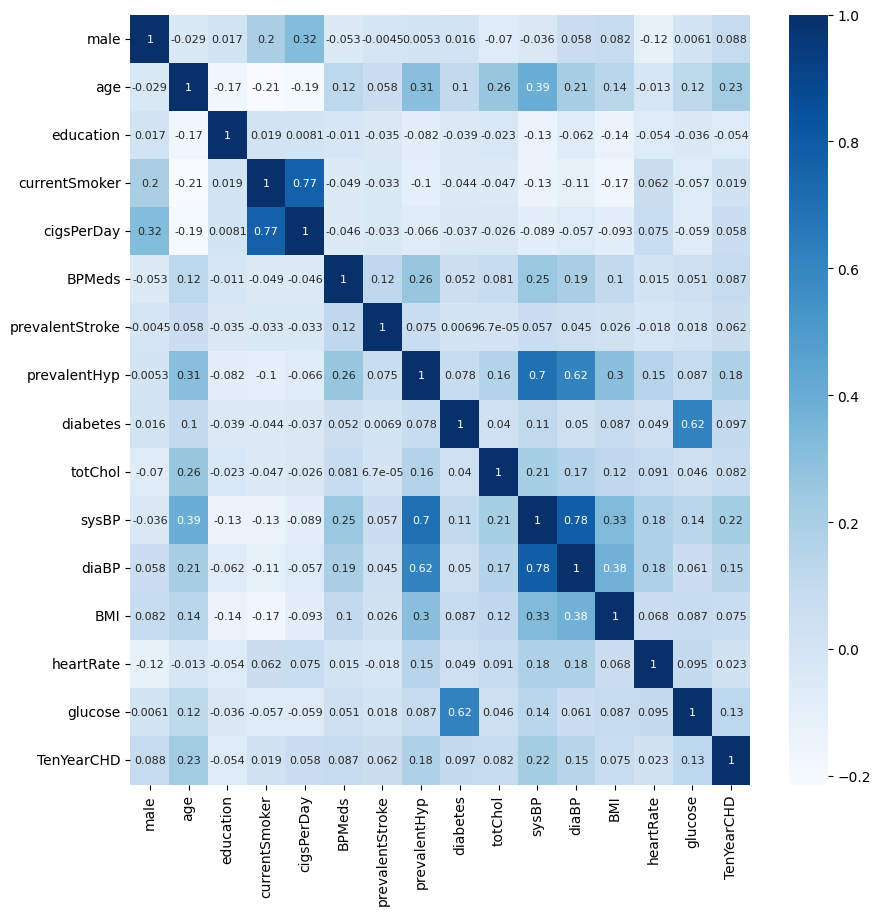

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="Blues", annot=True, annot_kws={"fontsize":8})
plt.show()

Na mapie korelacji widać, że zmienna education praktycznie nie jest zależna od jakiejkolwiek innej zmiennej (poza współzależnością z wiekiem - bradzo słaba zależność).  
Sprawdźmy, jak rozkładają się dane związane z tą zmienną:

### Zmienna TenYearCHD  
Zmienna objaśniana

In [13]:
df.TenYearCHD.value_counts(normalize=True)

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

15.2% danych stanowi informację o potencjalnym wystąpieniu choroby serca w ciągu najbliższych 10 lat. 

### Zmienna male

In [14]:
print(df.male.value_counts())
print(df.male.value_counts(normalize=True))

0    2419
1    1819
Name: male, dtype: int64
0    0.570788
1    0.429212
Name: male, dtype: float64


Zbiór danych zawiera zapisane rekordy 2419 kobiet (57%) i 1819 mężczyzn (43%).

### Zmienna age

In [15]:
print(f'Minimalny wiek pacjenta: {df.age.min()}, maksymalny wiek pacjenta: {df.age.max()}')

Minimalny wiek pacjenta: 32, maksymalny wiek pacjenta: 70


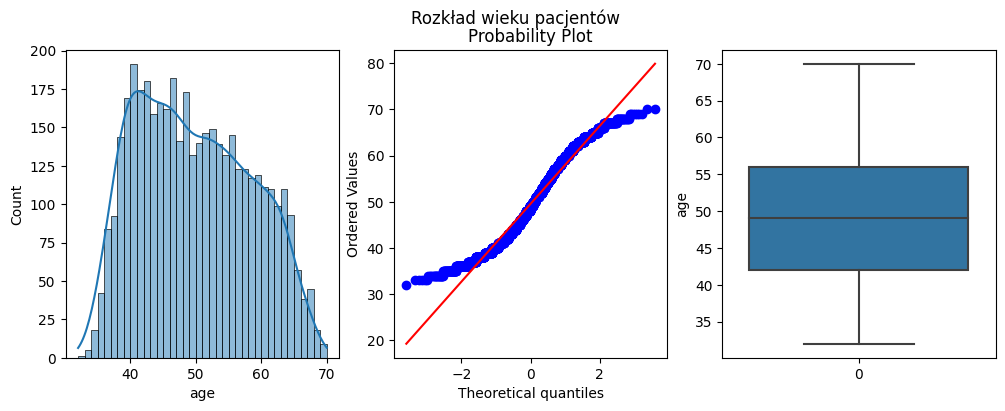

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
sns.histplot(df.age, kde=True, bins=38, ax=ax[0])

stats.probplot(df.age,plot=ax[1])

sns.boxplot(df.age, ax=ax[2])
ax[2].set_ylabel('age')

plt.suptitle('Rozkład wieku pacjentów')
plt.show()

In [17]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)
pt_bx = PowerTransformer(method='box-cox', standardize=True)
qt = QuantileTransformer(output_distribution='normal')

In [18]:
data_pt = pt.fit_transform(df.age.values.reshape(-1,1))
data_pt_bx = pt_bx.fit_transform(df.age.values.reshape(-1,1))
data_qt = qt.fit_transform(df.age.values.reshape(-1,1))

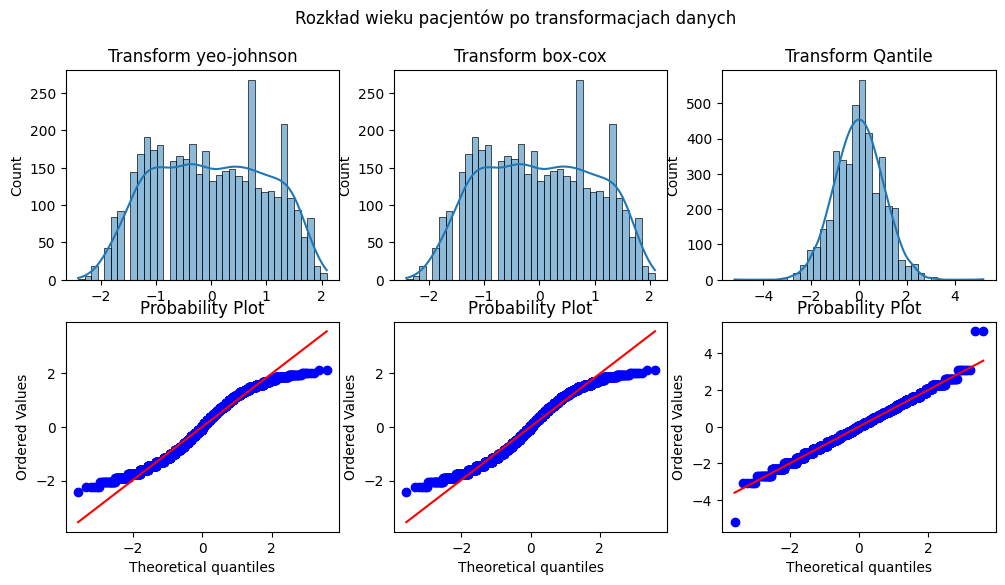

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

sns.histplot(data_pt, kde=True, bins=38, ax=ax[0,0], legend=False)
ax[0,0].set_title('Transform yeo-johnson')

sns.histplot(data_pt_bx, kde=True, bins=38, ax=ax[0,1], legend=False)
ax[0,1].set_title('Transform box-cox')

sns.histplot(data_qt, kde=True, bins=38, ax=ax[0,2], legend=False)
ax[0,2].set_title('Transform Qantile')

stats.probplot(data_pt.reshape(1,-1)[0],plot=ax[1,0])
stats.probplot(data_pt_bx.reshape(1,-1)[0],plot=ax[1,1])
stats.probplot(data_qt.reshape(1,-1)[0],plot=ax[1,2])
plt.suptitle('Rozkład wieku pacjentów po transformacjach danych')

plt.show()

In [20]:
df_transform = pd.DataFrame()

In [21]:
df_transform['age'] = pd.DataFrame(data_pt)

Do budowania modelu przyjmiemy transformację wieku poprzez QuantileTransformer.

### Zmienna education

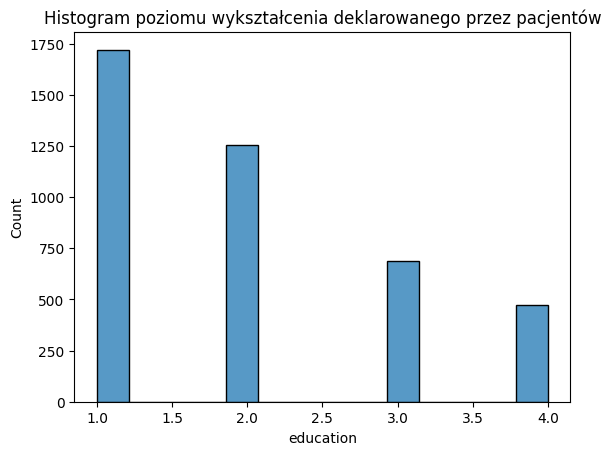

In [22]:
sns.histplot(df.education)
plt.title('Histogram poziomu wykształcenia deklarowanego przez pacjentów')
plt.show()

In [23]:
df.education.value_counts(normalize=True)

1.0    0.416163
2.0    0.303170
3.0    0.166223
4.0    0.114445
Name: education, dtype: float64

41.6% rekordów z uzupełnionymi danymi dotyczy najniższego poziomu edukacji - 1, a 11.4% dla najwyższego. Można spróbować uzupełnić proporcjonalnie te dane dla 105 rekordów, jednak zrezygnujemy obecnie tej zmiennej i ewentualnie do niej powrócimy, jeżeli modele będą niezadowalające.

In [24]:
df.drop('education', axis=1, inplace=True)

### Zmienna cigsPerDay
Kolejna zmienna zawierająca braki to cigsPerDay.  
Jak rozkładają się wartości tej zmiennej:

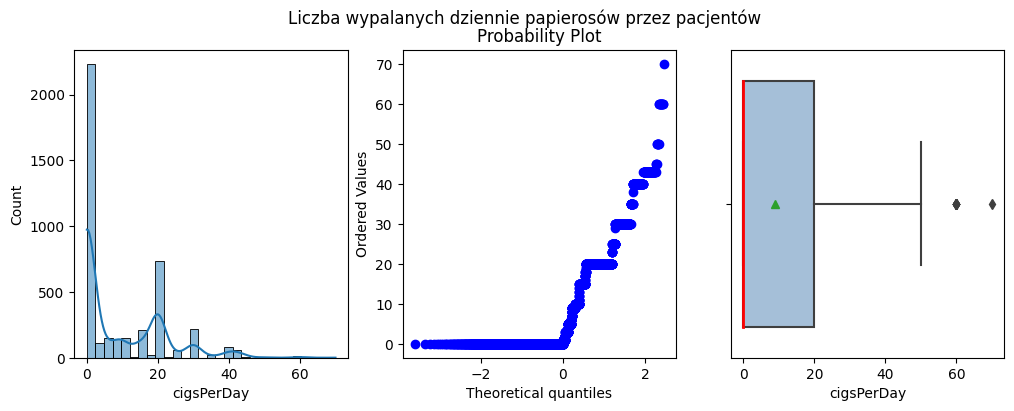

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
sns.histplot(df.cigsPerDay, kde=True, ax=ax[0])
stats.probplot(df.cigsPerDay, plot=ax[1])
sns.boxplot(df, x='cigsPerDay', orient='h', showmeans=True, boxprops={"facecolor": (.3, .5, .7, .5)}, medianprops={"color": "r", "linewidth": 2}, ax=ax[2])
plt.suptitle('Liczba wypalanych dziennie papierosów przez pacjentów')
plt.show()

Mediana wartości zapisanych w rekordach wynosi 0, dlatego możemy przypuszczać, że połowa danych dotyczy palaczy "okazjonalnych" lub osób, które rzucają palenie.  
Znalazły się także dane, które znacznie przewyższają średnie liczby wypalanych papierosów (outlayer).

In [26]:
# Średnia wypalanych papierosów
df['cigsPerDay'].mean()

9.003088619624615

In [27]:
# Średnia wypalanych papierosów bez wartości odstających
df.drop(list(df[df.cigsPerDay>50].index), axis=0)['cigsPerDay'].mean()

8.854896354538957

Średnia wypalanych dziennie papierosów oscyluje przy liczbie 9, co zostanie uzupełnione w brakujących danych. 

In [28]:
df['cigsPerDay'].fillna(value=9, inplace=True) 

#### Normalizujemy dane
Box-cox można wykorzystać tylko dla danych > 0.

In [29]:
data_pt = pt.fit_transform(df.cigsPerDay.values.reshape(-1,1))
data_qt = qt.fit_transform(df.cigsPerDay.values.reshape(-1,1))

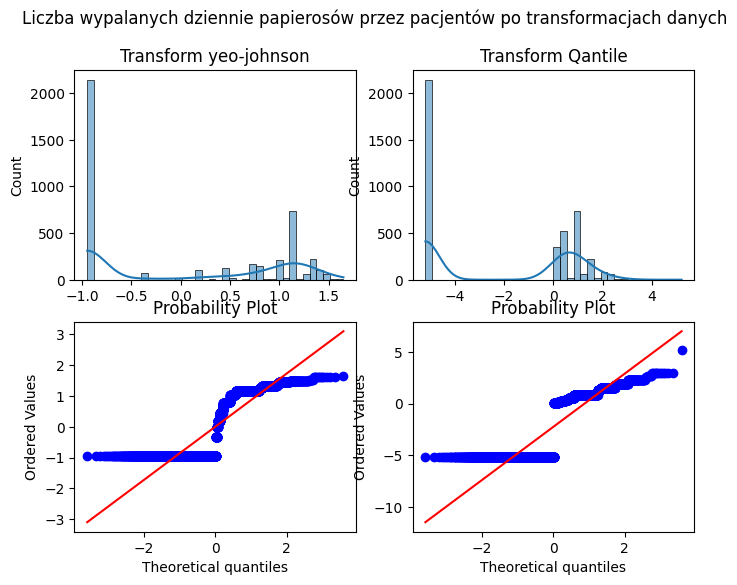

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

sns.histplot(data_pt, kde=True, bins=38, ax=ax[0,0], legend=False)
ax[0,0].set_title('Transform yeo-johnson')

sns.histplot(data_qt, kde=True, bins=38, ax=ax[0,1], legend=False)
ax[0,1].set_title('Transform Qantile')

stats.probplot(data_pt.reshape(1,-1)[0],plot=ax[1,0])
stats.probplot(data_qt.reshape(1,-1)[0],plot=ax[1,1])
plt.suptitle('Liczba wypalanych dziennie papierosów przez pacjentów po transformacjach danych')

plt.show()

Pozostanie nam zostawić dane takimi jak są...

### Zmienna BPMeds
Kolejna zmienna zawierająca braki to BPMeds.  
Jak rozkładają się wartości tej zmiennej:

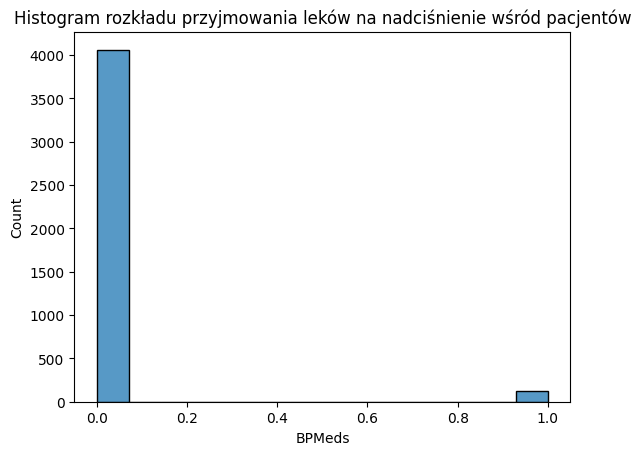

In [31]:
sns.histplot(df.BPMeds)
plt.title('Histogram rozkładu przyjmowania leków na nadciśnienie wśród pacjentów')
plt.show()

In [32]:
df.BPMeds.value_counts(normalize=True)

0.0    0.97037
1.0    0.02963
Name: BPMeds, dtype: float64

Poniżej 3% badanych pacjentów nie przyjmowało leków na nadciśnienie, a braki w danych tej zmiennej stanowią 1.25%. Brakujące dane uzupełnione zostaną wartością 0.

In [33]:
df['BPMeds'].fillna(value=0, inplace=True) 

### Zmienna totChol
Kolejna zmienna zawierająca braki to totChol.  
Jak rozkładają się wartości tej zmiennej:

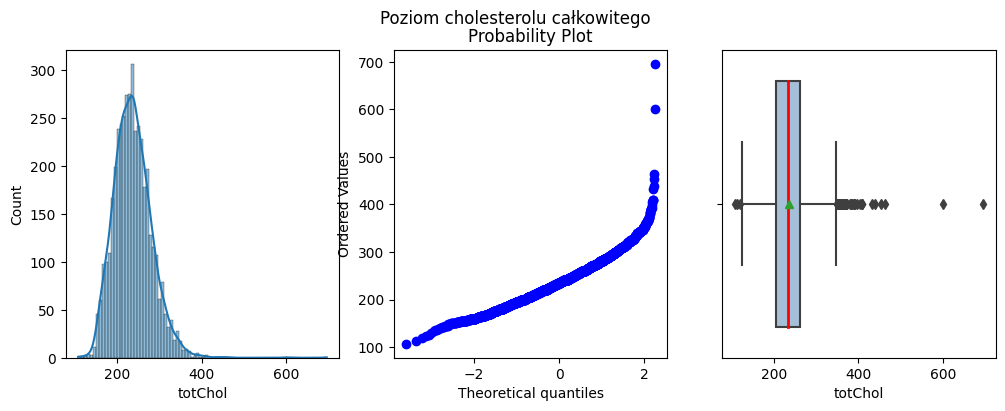

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
sns.histplot(df.totChol, kde=True, ax=ax[0])
stats.probplot(df.totChol, plot=ax[1])
sns.boxplot(df, x='totChol', orient='h', showmeans=True, boxprops={"facecolor": (.3, .5, .7, .5)}, medianprops={"color": "r", "linewidth": 2}, ax=ax[2])
plt.suptitle('Poziom cholesterolu całkowitego')
plt.show()

Mediana wartości poziomu cholesterolu całkowitego jest zbliżona do średniej wartości.  
Braki w danych dotyczących poziomu cholesterolu całkowitego wynoszą 1.17% i zostaną uzupełnione średnią z mediany i średniej poziomu cholesterolu.

In [35]:
df['totChol'].fillna(value=np.mean([df.totChol.mean(), df.totChol.median()]), inplace=True) 

In [36]:
data_pt = pt.fit_transform(df.totChol.values.reshape(-1,1))
data_pt_bx = pt_bx.fit_transform(df.totChol.values.reshape(-1,1))
data_qt = qt.fit_transform(df.totChol.values.reshape(-1,1))

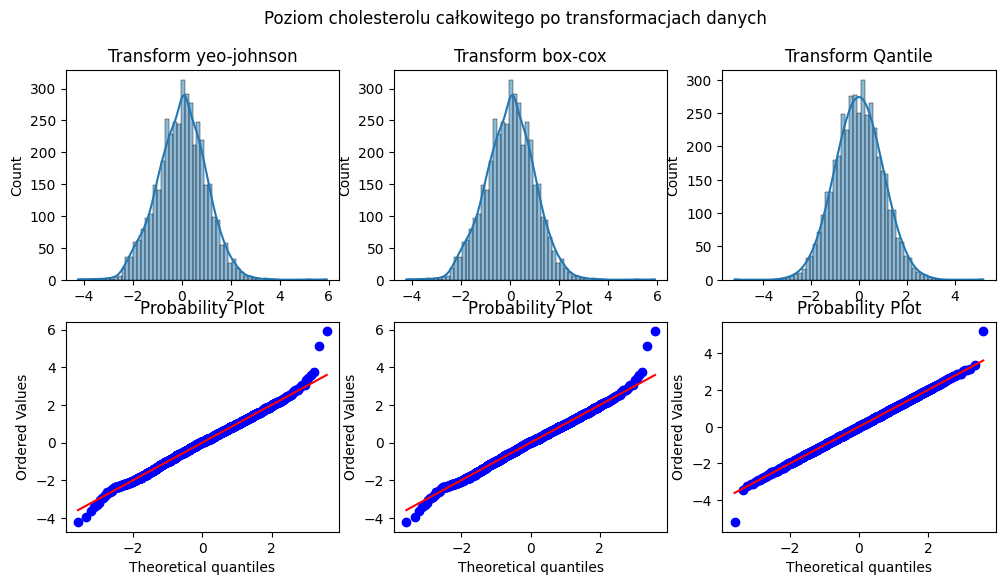

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

sns.histplot(data_pt, kde=True, ax=ax[0,0], legend=False)
ax[0,0].set_title('Transform yeo-johnson')

sns.histplot(data_pt_bx, kde=True, ax=ax[0,1], legend=False)
ax[0,1].set_title('Transform box-cox')

sns.histplot(data_qt, kde=True, ax=ax[0,2], legend=False)
ax[0,2].set_title('Transform Qantile')

stats.probplot(data_pt.reshape(1,-1)[0],plot=ax[1,0])
stats.probplot(data_pt_bx.reshape(1,-1)[0],plot=ax[1,1])
stats.probplot(data_qt.reshape(1,-1)[0],plot=ax[1,2])
plt.suptitle('Poziom cholesterolu całkowitego po transformacjach danych') 

plt.show()

In [38]:
df_transform['totChol'] = pd.DataFrame(data_pt)

Do budowania modelu przyjmiemy transformację wieku poprzez QuantileTransformer.

### Zmienna BMI
Kolejna zmienna zawierająca braki to BMI.  
Jak rozkładają się wartości tej zmiennej:

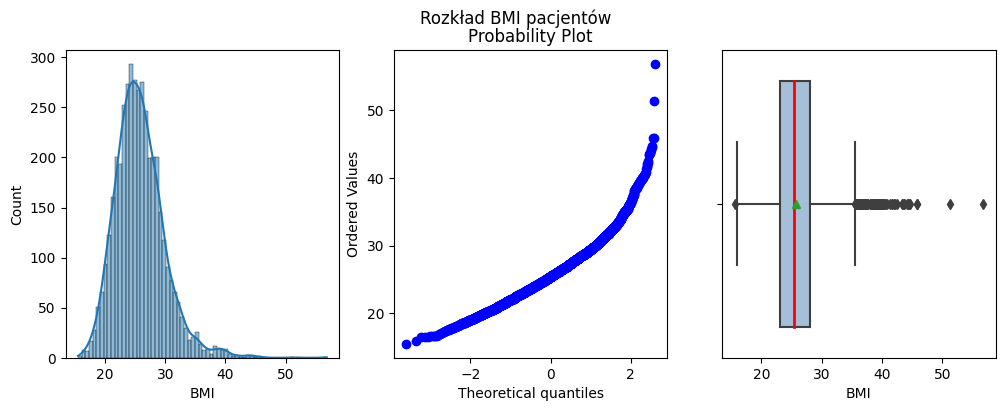

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
sns.histplot(df.BMI, kde=True, ax=ax[0])
stats.probplot(df.BMI, plot=ax[1])
sns.boxplot(df, x='BMI', orient='h', showmeans=True, boxprops={"facecolor": (.3, .5, .7, .5)}, medianprops={"color": "r", "linewidth": 2}, ax=ax[2])
plt.suptitle('Rozkład BMI pacjentów')
plt.show()

Podobnie jak w przypadku poziomu cholesterolu całkowitego dane zostaną uzupełnione średnią z mediany i średniej BMI.

In [40]:
df['BMI'].fillna(value=np.mean([df.BMI.mean(), df.BMI.median()]), inplace=True) 

In [41]:
data_pt = pt.fit_transform(df.BMI.values.reshape(-1,1))
data_pt_bx = pt_bx.fit_transform(df.BMI.values.reshape(-1,1))
data_qt = qt.fit_transform(df.BMI.values.reshape(-1,1))

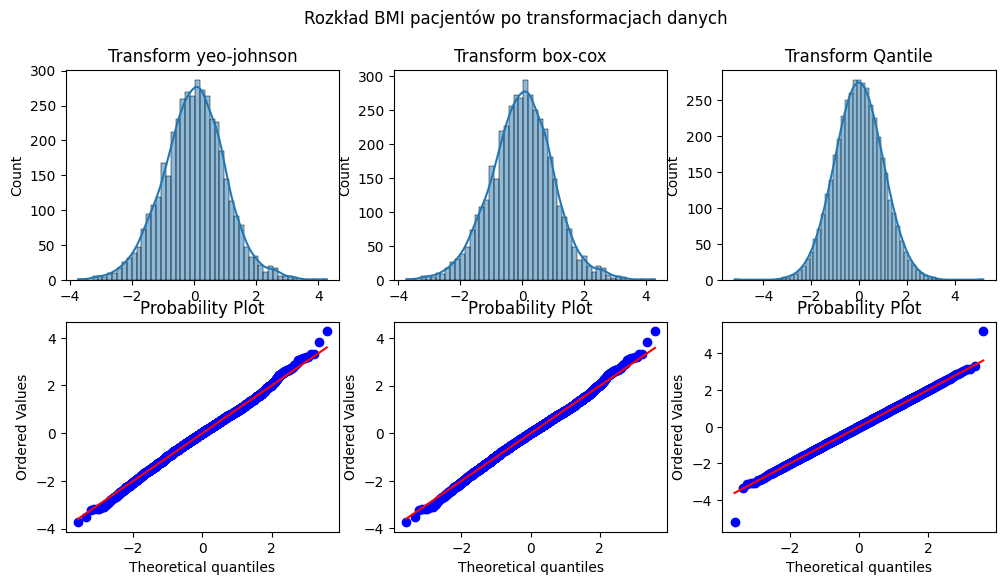

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

sns.histplot(data_pt, kde=True, ax=ax[0,0], legend=False)
ax[0,0].set_title('Transform yeo-johnson')

sns.histplot(data_pt_bx, kde=True, ax=ax[0,1], legend=False)
ax[0,1].set_title('Transform box-cox')

sns.histplot(data_qt, kde=True, ax=ax[0,2], legend=False)
ax[0,2].set_title('Transform Qantile')

stats.probplot(data_pt.reshape(1,-1)[0],plot=ax[1,0])
stats.probplot(data_pt_bx.reshape(1,-1)[0],plot=ax[1,1])
stats.probplot(data_qt.reshape(1,-1)[0],plot=ax[1,2])
plt.suptitle('Rozkład BMI pacjentów po transformacjach danych') 

plt.show()

In [43]:
df_transform['BMI'] = pd.DataFrame(data_pt)

Do budowania modelu przyjmiemy transformację wieku poprzez QuantileTransformer.

### Zmienna heartRate

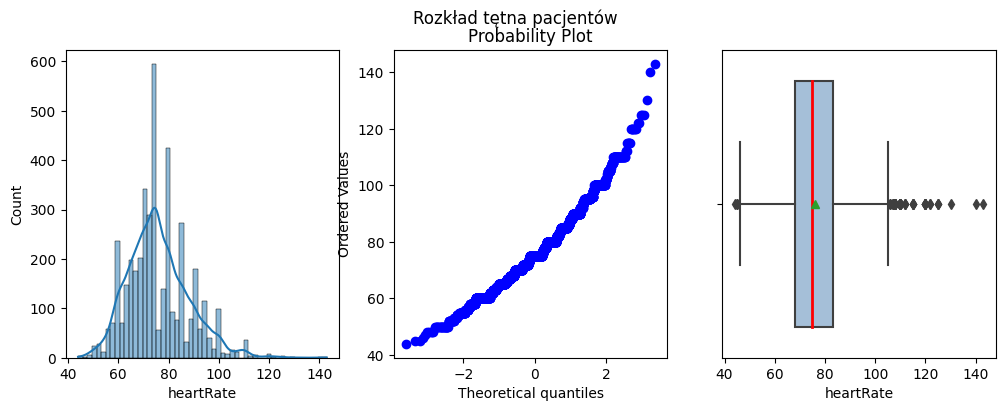

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
sns.histplot(df.heartRate, kde=True, ax=ax[0])
stats.probplot(df.heartRate, plot=ax[1])
sns.boxplot(df, x='heartRate', orient='h', showmeans=True, boxprops={"facecolor": (.3, .5, .7, .5)}, medianprops={"color": "r", "linewidth": 2}, ax=ax[2])
plt.suptitle('Rozkład tętna pacjentów')
plt.show()

Braki w zmiennej: 

In [45]:
df[df['heartRate'].isna()]

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
689,1,64,1,18.0,0.0,0,1,0,219.0,172.5,75.0,29.29,NaN,91.0,1


Pojedynczy rekord można usunąć z bazy, jednak zmienna wyjaśniana TenYearCHD posiada ustawioną flagę na 1, więc wyniki tego wiersza są dla nas istotne.  
Wątpliwości co do rzetelności danych wzbudzają w tym rekordzie dane diaBP, które w tym przypadku jest bardzo niskie, a posiadają niewielką korelację ze zmienną TenYearCHD.   
Jako uzupełnienie heartRate przyjmiemy średnie tętno dla osób w podobnym wieku, ze stwierdzonym nadciśnieniem prevalentHyp, posiadających zbliżone BMI i dane sysBP (korelacje pomiędzy tymi zmiennymi).

In [46]:
heart_rate_mean = round(df[(df.age>60)&(df.age<66)&(df.sysBP>170)&(df.sysBP<175)&(df.BMI>29)&(df.BMI<30)&(df.prevalentHyp==1)])['heartRate'].mean()

In [47]:
df['heartRate'].fillna(value=heart_rate_mean, inplace=True) 

In [48]:
data_pt = pt.fit_transform(df.heartRate.values.reshape(-1,1))
data_pt_bx = pt_bx.fit_transform(df.heartRate.values.reshape(-1,1))
data_qt = qt.fit_transform(df.heartRate.values.reshape(-1,1))

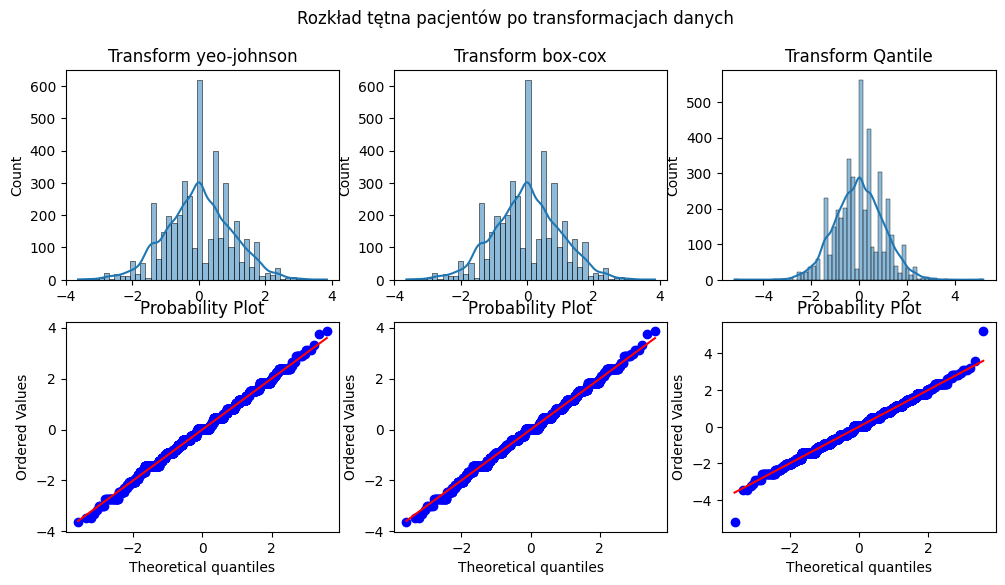

In [49]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

sns.histplot(data_pt, kde=True, ax=ax[0,0], legend=False)
ax[0,0].set_title('Transform yeo-johnson')

sns.histplot(data_pt_bx, kde=True, ax=ax[0,1], legend=False)
ax[0,1].set_title('Transform box-cox')

sns.histplot(data_qt, kde=True, ax=ax[0,2], legend=False)
ax[0,2].set_title('Transform Qantile')

stats.probplot(data_pt.reshape(1,-1)[0],plot=ax[1,0])
stats.probplot(data_pt_bx.reshape(1,-1)[0],plot=ax[1,1])
stats.probplot(data_qt.reshape(1,-1)[0],plot=ax[1,2])
plt.suptitle('Rozkład tętna pacjentów po transformacjach danych') 

plt.show()

In [50]:
df_transform['heartRate'] = pd.DataFrame(data_pt)

Do budowania modelu przyjmiemy transformację wieku poprzez yeo-johnson.

### Zmienna glucose

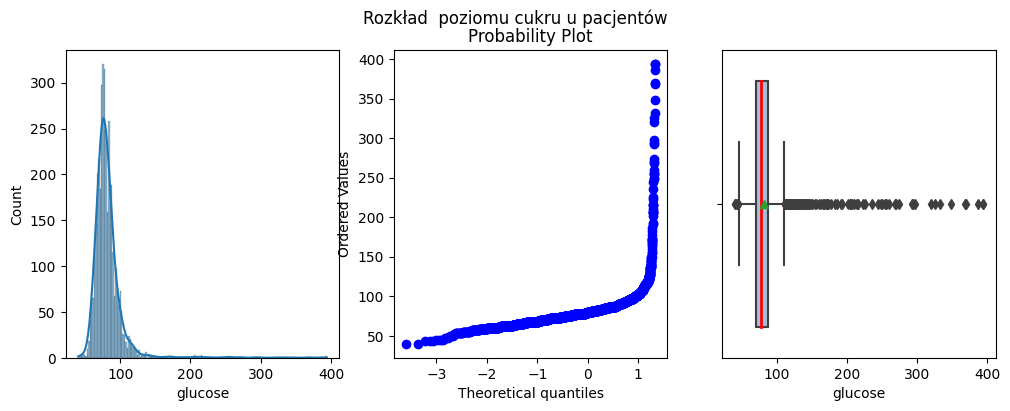

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
sns.histplot(df.glucose, kde=True, ax=ax[0])
stats.probplot(df.glucose, plot=ax[1])
sns.boxplot(df, x='glucose', orient='h', showmeans=True, boxprops={"facecolor": (.3, .5, .7, .5)}, medianprops={"color": "r", "linewidth": 2}, ax=ax[2])
plt.suptitle('Rozkład  poziomu cukru u pacjentów')
plt.show()

W zmiennej glucose brakuje 388 wartości, co stanowi 9.15% danych.  
Zmienna ta jest umiarkowanie skorelowana z informacją o stwierdzonej cukrzycy.  
Uzupełnienia brakujących danych dokonamy w oparciu o średnie dla pacjentów z i bez stwierdzonej cukrzycy.

In [52]:
diabetes_glucose_1 = df[df.diabetes==1]['glucose'].mean()
diabetes_glucose_0 = df[df.diabetes==0]['glucose'].mean()

In [53]:
for x in list(df[(df.isna().any(axis=1))&df.diabetes==1].index):
    df.at[x, 'glucose'] = diabetes_glucose_1

In [54]:
for x in df[(df.isna().any(axis=1))&(df.diabetes==0)].index:
    df.at[x, 'glucose'] = diabetes_glucose_0

In [55]:
data_pt = pt.fit_transform(df.glucose.values.reshape(-1,1))
data_pt_bx = pt_bx.fit_transform(df.glucose.values.reshape(-1,1))
data_qt = qt.fit_transform(df.glucose.values.reshape(-1,1))

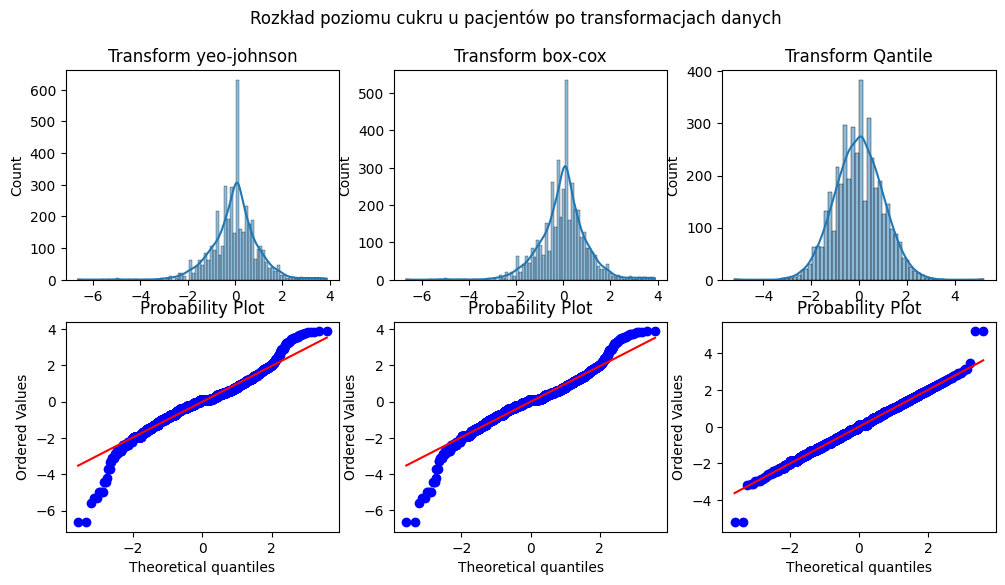

In [56]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

sns.histplot(data_pt, kde=True, ax=ax[0,0], legend=False)
ax[0,0].set_title('Transform yeo-johnson')

sns.histplot(data_pt_bx, kde=True, ax=ax[0,1], legend=False)
ax[0,1].set_title('Transform box-cox')

sns.histplot(data_qt, kde=True, ax=ax[0,2], legend=False)
ax[0,2].set_title('Transform Qantile')

stats.probplot(data_pt.reshape(1,-1)[0],plot=ax[1,0])
stats.probplot(data_pt_bx.reshape(1,-1)[0],plot=ax[1,1])
stats.probplot(data_qt.reshape(1,-1)[0],plot=ax[1,2])
plt.suptitle('Rozkład poziomu cukru u pacjentów po transformacjach danych') 

plt.show()

In [57]:
df_transform['glucose'] = pd.DataFrame(data_qt)

Do budowania modelu przyjmiemy transformację wieku poprzez QuantileTransformer.

### Zmienna sysBP

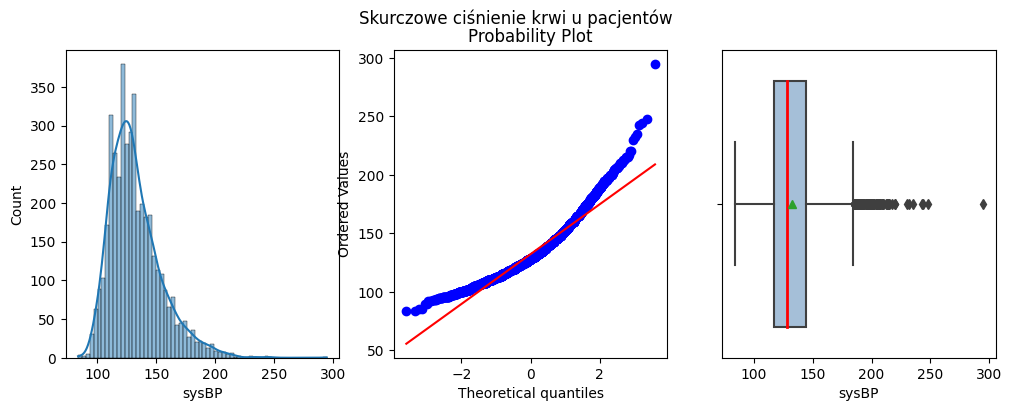

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
sns.histplot(df.sysBP, kde=True, ax=ax[0])
stats.probplot(df.sysBP, plot=ax[1])
sns.boxplot(df, x='sysBP', orient='h', showmeans=True, boxprops={"facecolor": (.3, .5, .7, .5)}, medianprops={"color": "r", "linewidth": 2}, ax=ax[2])
plt.suptitle('Skurczowe ciśnienie krwi u pacjentów')
plt.show()

In [59]:
data_pt = pt.fit_transform(df.sysBP.values.reshape(-1,1))
data_pt_bx = pt_bx.fit_transform(df.sysBP.values.reshape(-1,1))
data_qt = qt.fit_transform(df.sysBP.values.reshape(-1,1))

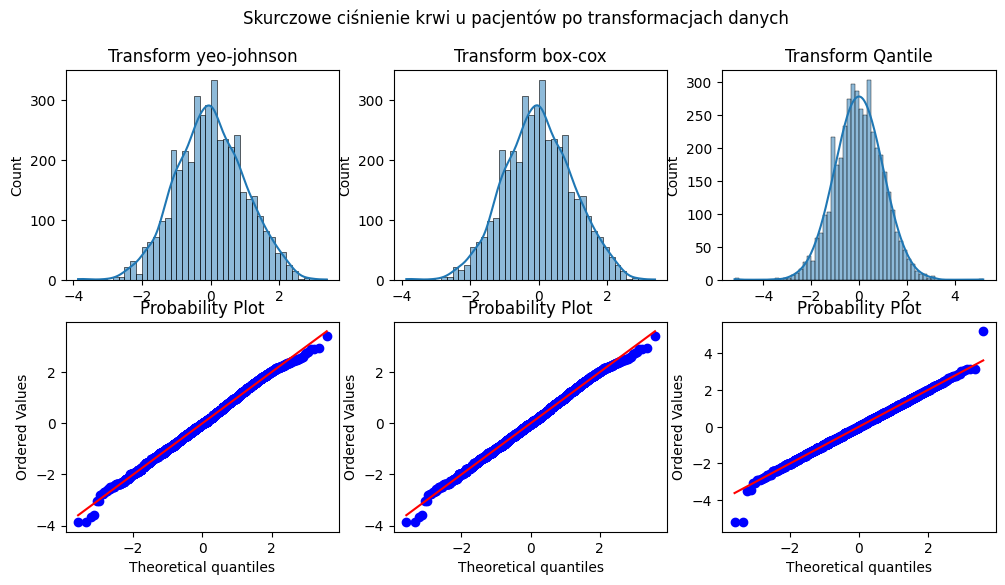

In [60]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

sns.histplot(data_pt, kde=True, ax=ax[0,0], legend=False)
ax[0,0].set_title('Transform yeo-johnson')

sns.histplot(data_pt_bx, kde=True, ax=ax[0,1], legend=False)
ax[0,1].set_title('Transform box-cox')

sns.histplot(data_qt, kde=True, ax=ax[0,2], legend=False)
ax[0,2].set_title('Transform Qantile')

stats.probplot(data_pt.reshape(1,-1)[0],plot=ax[1,0])
stats.probplot(data_pt_bx.reshape(1,-1)[0],plot=ax[1,1])
stats.probplot(data_qt.reshape(1,-1)[0],plot=ax[1,2])
plt.suptitle('Skurczowe ciśnienie krwi u pacjentów po transformacjach danych') 

plt.show()

In [61]:
df_transform['sysBP'] = pd.DataFrame(data_pt)

Do budowania modelu przyjmiemy transformację wieku poprzez yeo-johnson.

### Zmienna diaBP

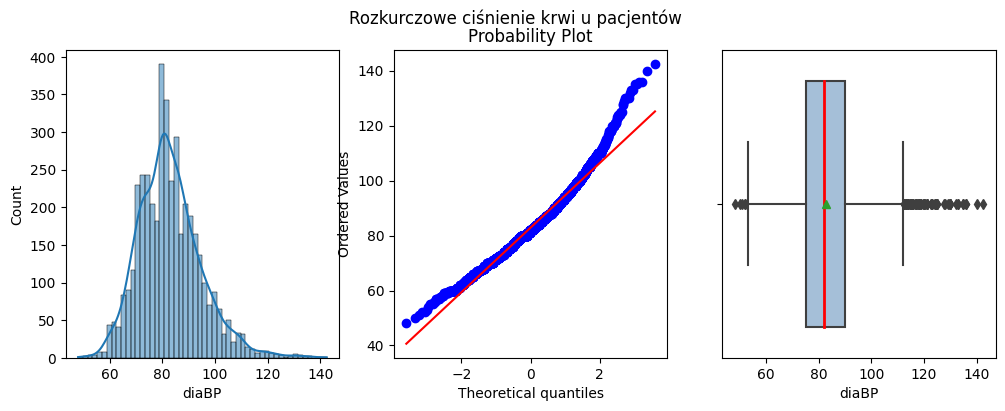

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
sns.histplot(df.diaBP, kde=True, ax=ax[0])
stats.probplot(df.diaBP, plot=ax[1])
sns.boxplot(df, x='diaBP', orient='h', showmeans=True, boxprops={"facecolor": (.3, .5, .7, .5)}, medianprops={"color": "r", "linewidth": 2}, ax=ax[2])
plt.suptitle('Rozkurczowe ciśnienie krwi u pacjentów')
plt.show()

In [63]:
data_pt = pt.fit_transform(df.diaBP.values.reshape(-1,1))
data_pt_bx = pt_bx.fit_transform(df.diaBP.values.reshape(-1,1))
data_qt = qt.fit_transform(df.diaBP.values.reshape(-1,1))

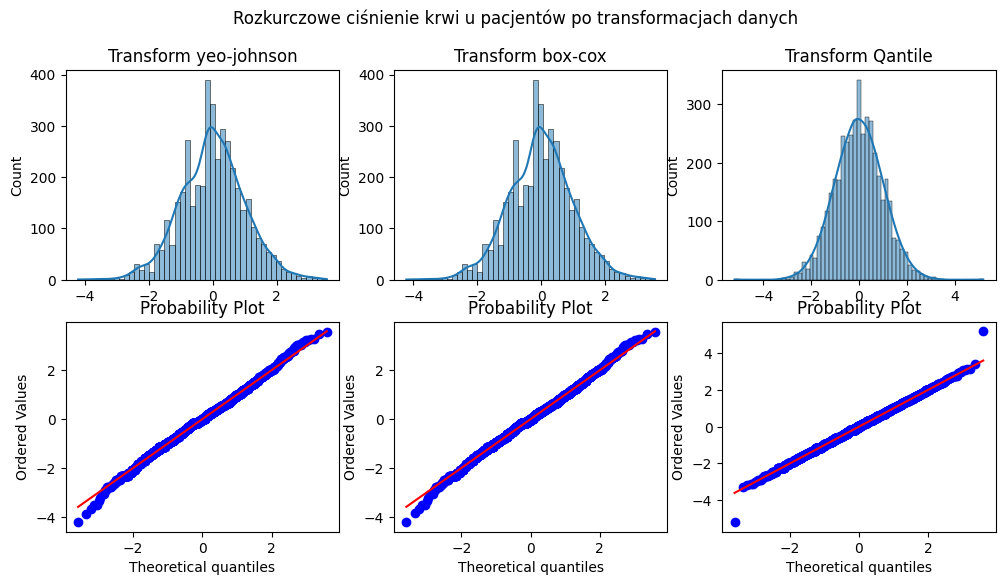

In [64]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

sns.histplot(data_pt, kde=True, ax=ax[0,0], legend=False)
ax[0,0].set_title('Transform yeo-johnson')

sns.histplot(data_pt_bx, kde=True, ax=ax[0,1], legend=False)
ax[0,1].set_title('Transform box-cox')

sns.histplot(data_qt, kde=True, ax=ax[0,2], legend=False)
ax[0,2].set_title('Transform Qantile')

stats.probplot(data_pt.reshape(1,-1)[0],plot=ax[1,0])
stats.probplot(data_pt_bx.reshape(1,-1)[0],plot=ax[1,1])
stats.probplot(data_qt.reshape(1,-1)[0],plot=ax[1,2])
plt.suptitle('Rozkurczowe ciśnienie krwi u pacjentów po transformacjach danych') 

plt.show()

In [66]:
df_transform['diaBP'] = pd.DataFrame(data_pt)

Do budowania modelu przyjmiemy transformację wieku poprzez Quantile.

### Sprawdzenie uzupełnienia wszystkich danych

In [67]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Przeskalujmy dane

In [68]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [70]:
df_scaled = pd.DataFrame()

In [71]:
df_scaled[['cigsPerDay']] = std_scaler.fit_transform(df[['cigsPerDay']])

In [72]:
df_EDA = pd.concat([df_transform, df_scaled, df[['male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']]], axis=1)

## Sprawdzimy możliwości zbudowania modelu przewidującego wystąpienie choroby

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
# function show confusion matrix
def show_cm(test, pred, title=''):
    fig, ax = plt.subplots(ncols=1, figsize=(4, 4))
    cm = confusion_matrix(test, pred)
    names = ['True Neg.', 'False Pos.', 'False Neg.', 'True Pos.']
    counts = [x for x in cm.flatten()]
    percentages = [f'{round(x, 2)*100}%' for x in cm.flatten() / np.sum(cm)]
    labels = [f'{x1}\n{x2}\n{x3}' for x1, x2, x3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm/np.sum(cm), annot=labels, fmt='', cmap='Blues', ax=ax, cbar=None)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values');
    ax.xaxis.set_ticklabels(['False', 'True'])
    ax.yaxis.set_ticklabels(['False', 'True'])
    plt.title(f'{title}\nAccuracy: {round(accuracy_score(test, pred), 2)*100}%')
    plt.show()

In [75]:
data = df_EDA.values

In [76]:
X, y = data[:, :-1], data[:, -1]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, shuffle=True)

#### Biblioteka sklearn

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

In [91]:
model = LogisticRegression(solver='liblinear')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(f'Accuracy: {round(np.mean(scores),3)}')
models_libs['sklearn'].append(round(np.mean(scores),3))

Accuracy: 0.853


In [92]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [93]:
y_pred = model.predict(X_test)

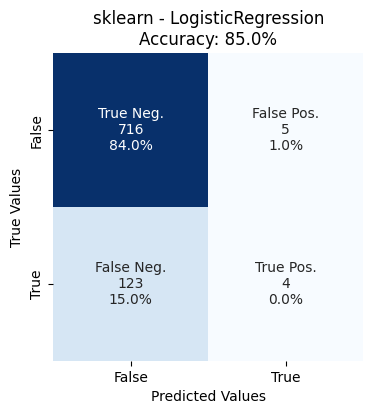

In [94]:
show_cm(y_test, y_pred, 'sklearn - LogisticRegression')

#### Biblioteka tensorflow

In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [112]:
number_of_classes = 1
number_of_features = X.shape[1]
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim = number_of_features))
# model.add(Dropout(.1))
model.add(Dense(64, activation = 'relu', input_dim = number_of_features))
# model.add(Dropout(.1))
model.add(Dense(1, activation = 'sigmoid', input_dim = number_of_features))

In [113]:
model.compile(loss=["binary_crossentropy"],
    optimizer= 'adam',
    metrics=['binary_accuracy'])

In [114]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1920      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10241 (40.00 KB)
Trainable params: 10241 (40.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [115]:
history = model.fit(X_train, y_train.reshape(-1,1), epochs=150, verbose=1, shuffle=True, batch_size=16)

Epoch 1/150
212/212 [==============================] - 1s 2ms/step - loss: 0.4224 - binary_accuracy: 0.8398
Epoch 2/150
212/212 [==============================] - 0s 2ms/step - loss: 0.3883 - binary_accuracy: 0.8499
Epoch 3/150
212/212 [==============================] - 0s 1ms/step - loss: 0.3802 - binary_accuracy: 0.8528
Epoch 4/150
212/212 [==============================] - 0s 1ms/step - loss: 0.3749 - binary_accuracy: 0.8552
Epoch 5/150
212/212 [==============================] - 0s 2ms/step - loss: 0.3703 - binary_accuracy: 0.8525
Epoch 6/150
212/212 [==============================] - 0s 1ms/step - loss: 0.3657 - binary_accuracy: 0.8575
Epoch 7/150
212/212 [==============================] - 0s 1ms/step - loss: 0.3600 - binary_accuracy: 0.8605
Epoch 8/150
212/212 [==============================] - 0s 1ms/step - loss: 0.3589 - binary_accuracy: 0.8566
Epoch 9/150
212/212 [==============================] - 0s 2ms/step - loss: 0.3528 - binary_accuracy: 0.8611
Epoch 10/150
212/212 [======

In [116]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

27/27 [==============================] - 0s 1ms/step


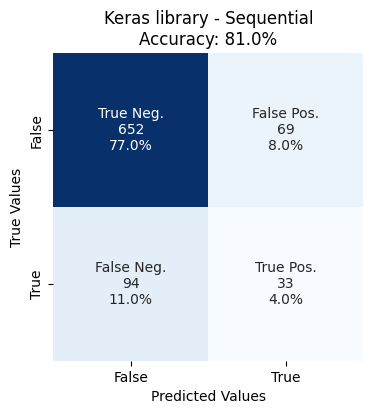

In [117]:
show_cm(y_test, y_pred, 'Keras library - Sequential')

## Wnioski

 Zbudowane modele w oparciu o powyższe biblioteki osiągnęły wyniki na zbiorze testowym niewiele ponad 80%.
 Modelu sequential praktycznie nauczył się danych testowych, jednak na danych testowych wyniki są niezadowalające.  
 11% fałszywie negatywnych oznaczeń jest zbyt dużym wynikiem dla tego typu danych. Oczywiście dużo zależy od wylosowanego zbioru treningowego i należy przeprowadzić dużo więcej symulacji.  
 Ogólny model można ulepszyć dzięki większej liczbie danych i zmianę doboru parametrów modeli.